# Finance & Analytics Club

## RSI (Relative Strength Index)

It is a momentum oscillator which measures the speed and change of price movements.

RSI values oscillates between 0 to 100 with values above 70 indicating that the asset has now reached overbought territory. Values below 30 signify oversold territory.

Assets can remain in oversold and overbought territory for a long period of time. 

More at: https://www.investopedia.com/terms/r/rsi.asp

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(364),dt.date.today())
ohlcv

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,188.769211
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004


### Function to calculate RSI

#### I would strongly urge you to go through any youtube video on RSI calculation through excel to get a clear indication about what we are about to do on the following code.

In [3]:
def RSI(DF,n):
    df = DF.copy()
    df['delta']=df['Adj Close'] - df['Adj Close'].shift(1)
    df['gain']=np.where(df['delta']>=0,df['delta'],0) # np.where is the if else staement for numpy, also check documentaion page
    df['loss']=np.where(df['delta']<0,abs(df['delta']),0) # note we are taking absolute value of loss
    avg_gain = []
    avg_loss = []
    gain = df['gain'].tolist()
    loss = df['loss'].tolist()
    for i in range(len(df)):
        if i < n:
            avg_gain.append(np.NaN)
            avg_loss.append(np.NaN)
        elif i == n:
            avg_gain.append(df['gain'].rolling(n).mean().tolist()[n])
            avg_loss.append(df['loss'].rolling(n).mean().tolist()[n])
        elif i > n:
            avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
            avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
    df['avg_gain']=np.array(avg_gain)
    df['avg_loss']=np.array(avg_loss)
    df['RS'] = df['avg_gain']/df['avg_loss']
    df['RSI'] = 100 - (100/(1+df['RS']))
    return df

In [7]:
df = RSI(ohlcv,14)
df = df.dropna()
df

,High,Low,Open,Close,Volume,Adj Close,delta,gain,loss,avg_gain,avg_loss,RS,RSI
Date,,,,,,,,,,,,,
2019-04-22,204.940002,202.339996,202.830002,204.529999,19439500.0,201.887497,0.661346,0.661346,0.000000,1.102707,0.165686,6.655383,86.937296
2019-04-23,207.750000,203.899994,204.429993,207.479996,23323000.0,204.799362,2.911865,2.911865,0.000000,1.231933,0.153852,8.007271,88.897859
2019-04-24,208.479996,207.050003,207.360001,207.160004,17540600.0,204.483505,-0.315857,0.000000,0.315857,1.143937,0.165424,6.915203,87.366086
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,202.627808,-1.855698,0.000000,1.855698,1.062228,0.286157,3.712039,78.777767
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,201.660461,-0.967346,0.000000,0.967346,0.986354,0.334814,2.945979,74.657745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,-4.870010,0.000000,4.870010,4.103738,7.857376,0.522278,34.308996
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,22.510010,22.510010,0.000000,5.418472,7.296135,0.742650,42.616119
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004,-1.360001,0.000000,1.360001,5.031438,6.872125,0.732152,42.268336


### Plottting RSI

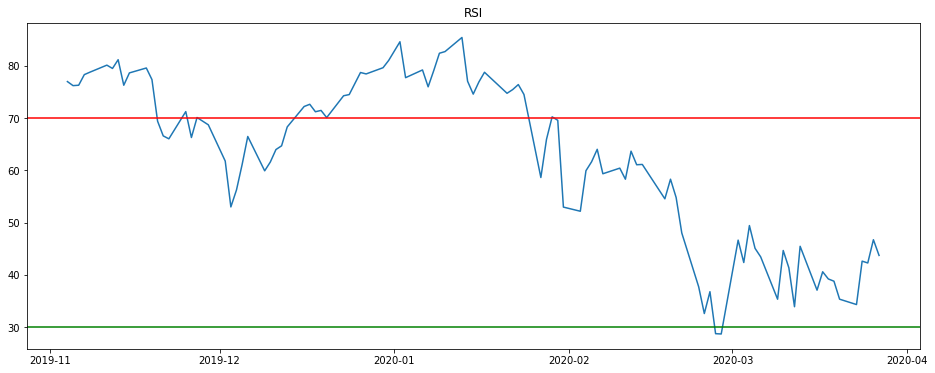

In [20]:
plt.figure(figsize = (16,6))
plt.plot(df.iloc[-100:,-1])
plt.title('RSI')
plt.axhline(y=70, color = 'red')
plt.axhline(y=30, color = 'green')
plt.show()

#### Points below red line indicates that stocks are overbought while points below green line indicates that the stocks are oversold.